# FODO cell, basic principles

The goal of this first step is to get a first glance at the Courant Snyder parameters.

These parameters are dependant on the length $L$ of the FODO cell and the gradient of magnetic field $\frac{\partial B_{y}}{\partial x}$. We will make the assummpitonWhen we take the limit of quadrupoles being thin lenses (thus thin $L$), we get the following equations


We set the value $k_1$, which  is a function of $s$ that characterises the focusing at each point along the beam line. In a drift space, for example, $k_1 = 0$ since the momentum of a particle will be constant. In a quadrupole, in the approximation:
$p_x \approx x_0$ :


$$\begin{array}{c}
L \rightarrow 0 \\
k_{1} L \rightarrow \frac{1}{f} \\
k_{1}=\frac{q}{P_{0}} \frac{\partial B_{y}}{\partial x}
\end{array}$$

$B_y(s)$ is the vertical component of the magnetic field

$P_0 = \beta_0\gamma_0 mc$ is the initial canonical momentum. Moreover, $\beta\gamma = \sqrt{\gamma^2-1}$ and $\gamma = \frac{E}{mc^2}$.
$q$ is the charge of the particle we consider.


In [17]:
import numpy as np
import math as m
import pandas
from matplotlib import pyplot as plt

In [18]:
L = 1; # length in meters TO BE SET
f = np.sqrt(2); # focal length in this qudrupole
k_1 = 1/(f*L); # k_1 in a quadrupole
k_1_drift = 0 # k_1 in a drift region



The transfer matrix for a quadrupole is the following
$$R_{\mathrm{F}}=\left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
-\frac{1}{f} & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{f} & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

The transfer matrix for a drift portion is the following

$$R_{\mathrm{drift}}=\left(\begin{array}{cccccc}
1 & L & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & L & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & \frac{L}{\beta_{0}^{2} \gamma_{0}^{2}} \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

For an entire FODO cell, with a starting point $s=s_0$ (entrance of the focusing quadrupole), we get the matrix $R = R_{drift}R_D R_{drift} R_F = R=\left(\begin{array}{ccc}
R_{x} & 0 & 0 \\
0 & R_{y} & 0 \\
0 & 0 & R_{z}
\end{array}\right)$

Where 
$$ R_{x}=\left(\begin{array}{cc}
1-\frac{L}{f}\left(1+\frac{L}{f}\right) & \frac{L}{f}(2 f+L) \\
-\frac{L}{f^{2}} & 1+\frac{L}{f}
\end{array}\right) \qquad R_{y}=\left(\begin{array}{cc}
1+\frac{L}{f}\left(1-\frac{L}{f}\right) & \frac{L}{f}(2 f-L) \\
-\frac{L}{f^{2}} & 1-\frac{L}{f} \end{array}\right)  \qquad R_{z}=\left(\begin{array}{ll}
1 & \frac{2 L}{\beta_{0}^{2} \gamma_{0}^{2}} \\
0 & 1 \end{array}\right)
$$

Notice that the $R_y$, which represents the defocusing plane is the same matrix that $R_x$ the focusing plane, with $f$ set to $-f$, which makes sense from an optical point of view.

In [19]:
# Building the transfer matrix of the FODO cell
Rx1 = 1 - L/f*(1+L/f); Rx2 = L/f*(2*f+L); Rx3 = -L/(f**2); Rx4 = 1+L/f;
Ry1 = 1 + L/f*(1-L/f); Ry2 = L/f*(2*f-L); Ry3 = -L/f**2; Ry4 = 1-L/f;
Rx = np.matrix([[Rx1, Rx2], [Rx3, Rx4]]);
Ry = np.matrix([[Ry1, Ry2], [Ry3, Ry4]]);


Now we want the coefficients. We will for that use the reference book *Beam Dynamics in High Energy Particle Accelerators* to get the appropriate formulas.

We know that in our case (a particle propagating in the x direction as its longitudinal direction), $ Tr(R_x) = 2 cos(\mu_x) $ where $\mu_x$ is the betatron phase advance. The trace is an invariant under changing the starting point, so does the phase advance.



We have the formula 

$$R_{x}=\left(\begin{array}{cc}
\cos \mu_{x}+\alpha_{x} \sin \mu_{x} & \beta_{x} \sin \mu_{x} \\
-\gamma_{x} \sin \mu_{x} & \cos \mu_{x}-\alpha_{x} \sin \mu_{x}
\end{array}\right)$$

Which allows us to find the values of the Courant Snyder parameters, using only the values found for $R_x$ and the value calculated for $\mu_x$.

In [20]:
# the coefficients at the focusing quadrupole
tr= Rx1 + Rx4;
mu_x = m.acos(tr/2) ; # plus or minus 1 at the beginning
alpha_x0 = (Rx1 - Rx4)/(2*np.sin(mu_x));
beta_x0 = Rx2/np.sin(mu_x);
gamma_x0 = -Rx3/np.sin(mu_x);
print(gamma_x0)

test = beta_x0*gamma_x0 - alpha_x0**2
print(test) # almost 1 , OK

# the coefficients at the defocusing quadrupole
tr= np.asscalar(Ry.trace());
mu_y = m.acos(tr/2) ;
alpha_y0 = (Ry1 - tr/2)/np.sin(mu_y);
beta_y0 = Ry2/np.sin(mu_y);
gamma_y0 = -Ry3/np.sin(mu_y); 
print(gamma_y0)

test = beta_y0*gamma_y0 - alpha_y0**2
print(test) # almost 1 , OK
# gamma remains a constant


0.7559289460184543
0.9999999999999991
0.7559289460184543
0.9999999999999998


<ipython-input-20-07491ec5bb38>:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


<!-- $$R(s_1,s_0) = \left(\begin{array}{cc}
\sqrt{\frac{\beta_{x 1}}{\beta_{x 0}}}\left(\cos \mu_{x}+\alpha_{x 0} \sin \mu_{x}\right) & \sqrt{\beta_{x 0} \beta_{x 1}} \sin \mu_{x} \\
\frac{\alpha_{x 0}-\alpha_{x 1}}{\sqrt{\beta_{x 0} \beta_{x 1}}} \cos \mu_{x}-\frac{1+\alpha_{x 0} \alpha_{x 1}}{\sqrt{\beta_{x 0} \beta_{x 1}}} \sin \mu_{x} & \sqrt{\frac{\beta_{x 0}}{\beta_{x 1}}}\left(\cos \mu_{x}-\alpha_{x 1} \sin \mu_{x}\right)
\end{array}\right)$$



To get the evolution of the parameters in the FODO lattice, we have to get the evolution of the parameters in the drift space, we can write the transfer matrix over a distance $s$ (4.90):

$$R_{x}=\left(\begin{array}{ll}
1 & s \\
0 & 1
\end{array}\right)$$

Then, performing the matrix multiplication in (4.29), we find:

$$\begin{array}{l}
\beta_{x}(s)=\beta_{x 0}+\frac{s^{2}}{\beta_{x 0}} \\
\alpha_{x}(s)=-\frac{s}{\beta_{x 0}}
\end{array}$$ -->



The equation (4.82) is the differential equation giving the behaviour of the $beta$  function :
$$\beta_{x}^{\prime \prime}-\frac{4+\beta_{x}^{\prime 2}}{2 \beta_{x}}+2 k_{1} \beta_{x}=0$$

We use this equation for drift spaces in between quadrupoles, where $k_1 = 0$. Solving this equation gives us solution of type:
$$\beta(s) = \frac{(c_1^2 + 4) s^2}{4 c_2} + c_1 s + c_2$$

Using the boundary conditions , we can get the equations of motion.

For the drift after the focusing quadrupole : $c_2 = \beta_{x0} \quad c_1 = \frac{- L^2 \pm \sqrt{\Delta}}{2\frac{L^2}{4\beta_{x_0}}}$ where $\Delta = L^2 - \frac{L^2}{4\beta_{x_0}}\left(\beta_{x_0} +\frac{L^2}{\beta_{x_0}} - \beta_{y_0}\right)$

The $\beta_{x0}$ depends on which drift space we consider. If we consider the $\beta_{y 0}$ calculated earlier.

For the $\alpha = - \frac{1}{2} \frac{d \beta}{ds} =  - \frac{1}{2} \left(\frac{(c_1^2 + 4) s}{2 c_2} + c_1 \right)$ 

Moreover we have the equation (4.74) which gives us $\beta_x \gamma_x - \alpha_x^2 = 1$



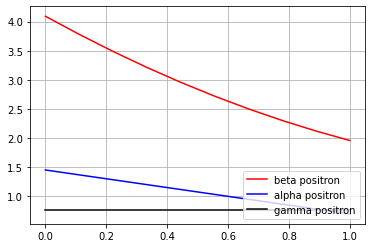

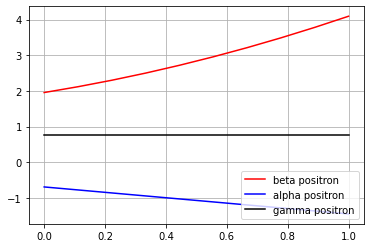

In [22]:
# we are going to devide the drift spaces
s = np.linspace(0,L,10);

    # drift after focusing
a = L**2/(4*beta_x0);
b = L;
c = beta_x0 + L**2/beta_x0 - beta_y0 ;
delta = b**2 - 4*a*c;
c_1 = (-b + np.sqrt(delta))/(2*a) # this solution of the polynomial is the physical one
c_2 = beta_x0;


beta_FD =  [(c_1**2 + 4)*x**2/(4*c_2) + c_1*x + c_2 for x in s] ;#beta in the drift following the focusing quadrupole
alpha_FD =  [ -1/2*((c_1**2 + 4)*x/(2*c_2) + c_1) for x in s];
gamma_FD = np.zeros(10);
for i in range(10) :
    gamma_FD[i] = (1 + alpha_FD[i]**2)/beta_FD[i]
    

    # drift after focusing
a = L**2/(4*beta_y0);
b = L;
c = beta_y0 + L**2/beta_y0 - beta_x0 ;
delta = b**2 - 4*a*c;
c_1 = (-b + np.sqrt(delta))/(2*a) # this solution of the polynomial is the physical one
c_2 = beta_y0;


beta_DD =  [(c_1**2 + 4)*x**2/(4*c_2) + c_1*x + c_2 for x in s] ;#beta in the drift following the defocusing quadrupole
alpha_DD =  [ -1/2*((c_1**2 + 4)*x/(2*c_2) + c_1) for x in s];
gamma_DD = np.zeros(10);
for i in range(10) :
    gamma_DD[i] = (1 + alpha_DD[i]**2)/beta_DD[i]



Fig = plt.figure()
plt.plot(s,beta_FD,'r',label = 'beta')
plt.plot(s,alpha_FD,'b',label = 'alpha')
plt.plot(s,gamma_FD,'k',label = 'gamma')
plt.grid(True)

Fig = plt.figure()
plt.plot(s,beta_DD,'r',label = 'beta')
plt.plot(s,alpha_DD,'b',label = 'alpha')
plt.plot(s,gamma_DD,'k',label = 'gamma')
plt.grid(True)

